
# 📊 Analyse des Réseaux Philosophiques à partir de Wikidata

Ce notebook vise à modéliser les relations philosophiques en s'appuyant sur les relations maître-élève issues de Wikidata.  
L'analyse se base uniquement sur le fichier `philosophes_post1700.csv` pour produire des visualisations de graphes orientés, bipartis, et des représentations matricielles.


In [1]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

plt.rcParams["figure.figsize"] = (12, 8)


In [2]:

# Chargement des données
df = pd.read_csv("philosophes_post1700.csv")
df.columns


Index(['philosopherLabel', 'birthDate', 'sexLabel', 'nationalityLabel',
       'movementLabel', 'teacherLabel', 'studentLabel'],
      dtype='object')

In [3]:

# Renommage cohérent
df.rename(columns={
    'philosopherLabel': 'nom',
    'birthDate': 'date_naissance',
    'sexLabel': 'genre',
    'movementLabel': 'ecole_pensee',
    'nationalityLabel': 'nationalite',
    'teacherLabel': 'maitre',
    'studentLabel': 'eleve'
}, inplace=True)

# On affiche un aperçu
df.head()


,nom,date_naissance,genre,nationalite,ecole_pensee,maitre,eleve
0,Vesna Pusić,1953-03-25T00:00:00Z,féminin,Croatie,NaN,NaN,NaN
1,Edmund Husserl,1859-04-08T00:00:00Z,masculin,empire d'Autriche,philosophie occidentale,Friedrich Paulsen,Martin Heidegger
2,Edmund Husserl,1859-04-08T00:00:00Z,masculin,Reich allemand,philosophie occidentale,Friedrich Paulsen,Martin Heidegger
3,Edmund Husserl,1859-04-08T00:00:00Z,masculin,empire d'Autriche,philosophie occidentale,Karl Weierstrass,Martin Heidegger
4,Edmund Husserl,1859-04-08T00:00:00Z,masculin,Reich allemand,philosophie occidentale,Karl Weierstrass,Martin Heidegger


## 🧠 Graphe des relations maître → élève

Nombre de philosophes : 172
Nombre de relations maître-élève : 126


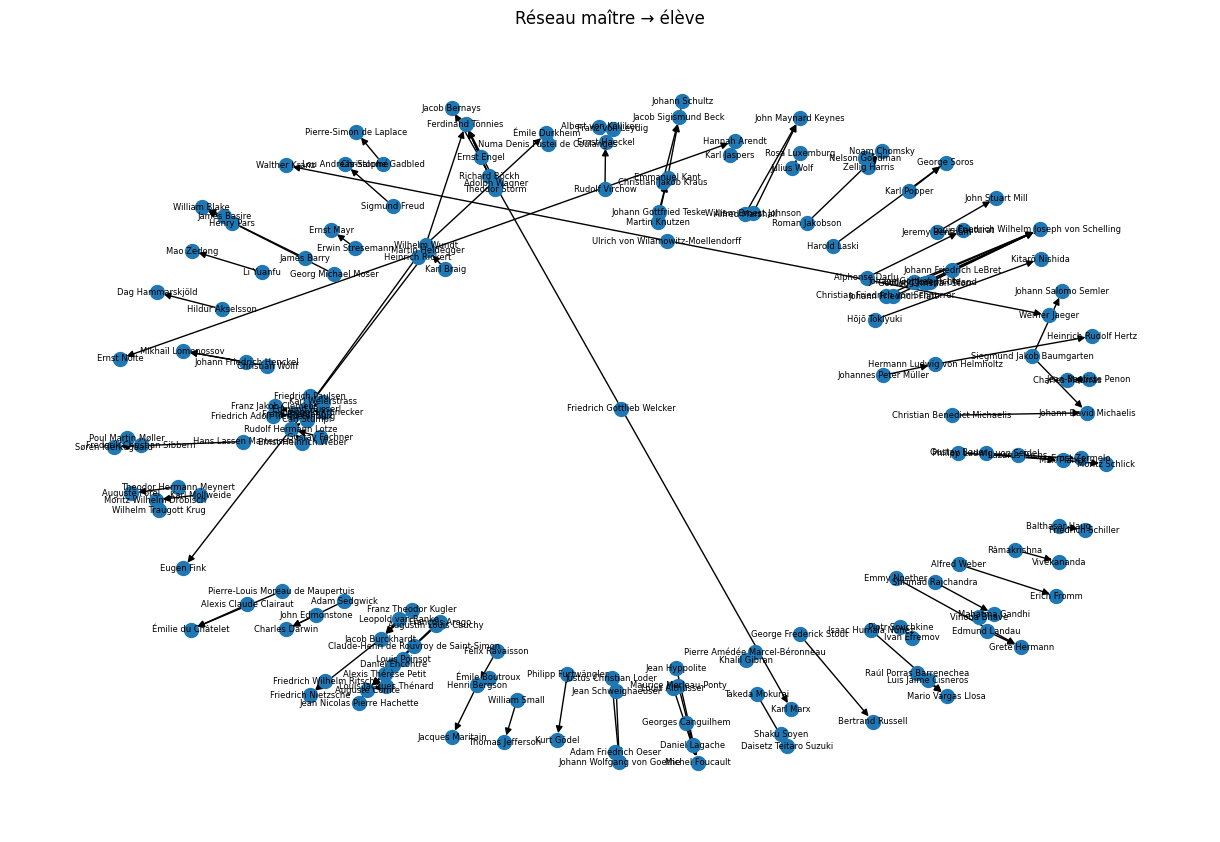

In [4]:

# On conserve les lignes où les deux colonnes sont non nulles
df_me = df[['nom', 'maitre']].dropna()

# Création du graphe
G = nx.DiGraph()
for _, row in df_me.iterrows():
    G.add_edge(row['maitre'], row['nom'])

print(f"Nombre de philosophes : {G.number_of_nodes()}")
print(f"Nombre de relations maître-élève : {G.number_of_edges()}")

# Dessin du graphe
plt.figure()
nx.draw(G, with_labels=True, node_size=100, font_size=6, arrows=True)
plt.title("Réseau maître → élève")
plt.show()


## 🌐 Visualisation interactive (Pyvis)

In [10]:
from pyvis.network import Network

net = Network(height="600px", width="100%", directed=True, notebook=False)
net.from_nx(G)

# Génère le fichier HTML SANS l’ouvrir automatiquement (contourne l’erreur)
net.write_html("graph_maitre_eleve.html")


C:\Users\salsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


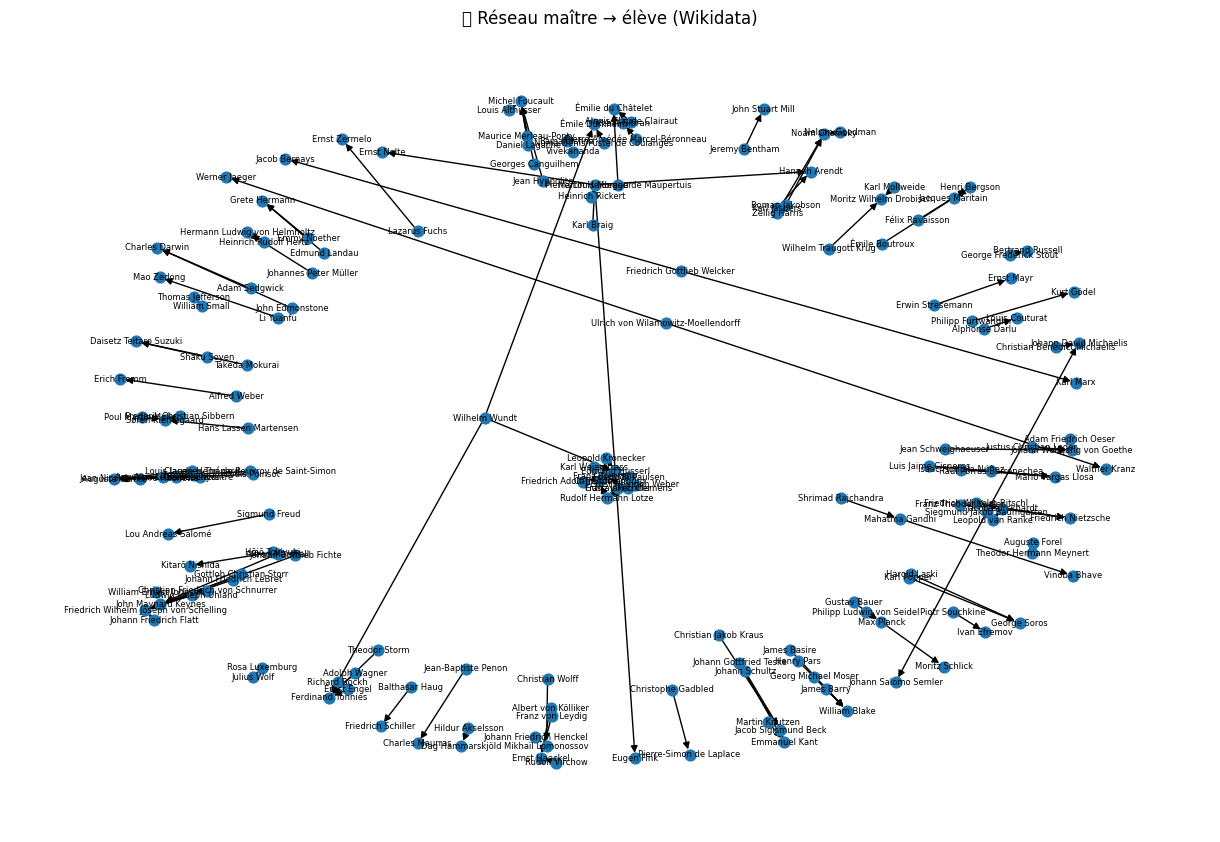

In [13]:
# Visualisation statique
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=60, font_size=6, arrows=True)
plt.title("🧠 Réseau maître → élève (Wikidata)")
plt.show()

## 🔢 Matrice d’adjacence du graphe maître → élève

In [17]:

adj_matrix = nx.to_pandas_adjacency(G, dtype=int)
adj_matrix.iloc[:10, :10]  # Aperçu


""
